<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/main/12_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! rm Colegio_Invisible -r

In [ ]:
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git

for an image...there are pixels

each pixel has 3,4 values (Red Green Blue and sometime Alpha)

those numbers are...1 byte...0 to 255

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
64*8

what can we put into blockchain...
Op_Return
80 bytes and we will use 64 bytes for image data

each byte is made up of 8 binary values 1/0 called bits

64 bytes = 64*8...512 bits

We want to put image in single block

PROPOSAL:

16x16 image = 256 pixels

only get to use 2 bits per pixel

- 0,0  0 
- 0,1  64
- 1,0  128
- 1,1  192

1 byte [ , , , , , , , ]

1 byte can tell us color of 4 pixels
each one taking up 2 bits

In [ ]:
""

In [ ]:
!ls Colegio_Invisible/img

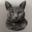

In [9]:
stego_image=Image.open('Colegio_Invisible/img/cat.png')
stego_image=stego_image.resize((32,32))
stego_image

In [10]:
type(stego_image)

PIL.Image.Image

In [8]:
stego_array = np.array(stego_image)
stego_array

array([[[226, 223, 218, 255],
        [224, 220, 215, 255],
        [221, 218, 212, 255],
        ...,
        [204, 198, 192, 255],
        [201, 196, 189, 255],
        [200, 194, 188, 255]],

       [[219, 216, 210, 255],
        [217, 214, 208, 255],
        [214, 211, 205, 255],
        ...,
        [202, 197, 190, 255],
        [200, 195, 188, 255],
        [198, 193, 186, 255]],

       [[209, 206, 199, 255],
        [207, 204, 197, 255],
        [205, 201, 195, 255],
        ...,
        [200, 194, 187, 255],
        [199, 193, 186, 255],
        [197, 191, 185, 255]],

       ...,

       [[135, 127, 120, 255],
        [133, 125, 118, 255],
        [130, 122, 116, 255],
        ...,
        [162, 154, 146, 255],
        [162, 155, 147, 255],
        [163, 156, 148, 255]],

       [[134, 126, 120, 255],
        [132, 124, 118, 255],
        [129, 122, 115, 255],
        ...,
        [161, 153, 145, 255],
        [162, 154, 146, 255],
        [162, 155, 147, 255]],

       [[133

**`uint8`** stands for unsigned 8-bit integer
- 8 binary 1/0 values
- that is one byte
- a number from 0-255
- two hex values like ff

In [12]:
2**8

256

In [11]:
stego_array.dtype

dtype('uint8')

In [13]:
stego_array.shape

(32, 32, 4)

In [ ]:
stego_array[:,:,:3]

In [54]:
def grey_imgarr(imgarr):
  return imgarr[:,:,:3].mean(axis=2).astype('uint8')

In [14]:
stego_array_grey=stego_array[:,:,:3].mean(axis=2).astype('uint8')
stego_array_grey.shape,stego_array_grey.dtype

((32, 32), dtype('uint8'))

In [15]:
stego_array_grey

array([[222, 219, 217, ..., 198, 195, 194],
       [215, 213, 210, ..., 196, 194, 192],
       [204, 202, 200, ..., 193, 192, 191],
       ...,
       [127, 125, 122, ..., 154, 154, 155],
       [126, 124, 122, ..., 153, 154, 154],
       [126, 124, 122, ..., 152, 153, 155]], dtype=uint8)

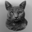

In [16]:
stego_image_grey = Image.fromarray(stego_array_grey)
stego_image_grey

In [18]:
def int_2_bit_array(num):
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(8-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

In [20]:
int_2_bit_array(255)

array([1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [22]:
int_2_bit_array(2)

array([0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [23]:
int_2_bit_array(64)

array([0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [24]:
int_2_bit_array(65)

array([0, 1, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [25]:
int_2_bit_array(68)

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [21]:
int_2_bit_array(1)

array([0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [19]:
int_2_bit_array(0)

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Goal:

- take image of 256 bytes and reduce each byte to 2 bit in form of 2 element array
- turn that all into 512 bits
- turn 512 bits into 64 bytes

# Generalize Standard For Images (MxN)

If we create a standard for the header that describes the data stored then we can choose the following paramenters:

- length
- width
- color dim 
- color bit count

In total the number of bits is the product of all the parameters

## Greyscale Image 

## RGB Image

## Two Channel Color Standard

## Four Channel

## General Color Dim



In [55]:
def grey_imgarr(imgarr):
  return imgarr[:,:,:3].mean(axis=2).astype('uint8')

def message_2_bit_array(message,mode=None):
    '''This function takes in a message as string, bytestring or hextring.
    If hexstring input the set mode='hex' '''
    if type(message)==bytes:
        hex_str=message.hex()
    elif (type(message)==str):
        if mode not in ('hex','hexstring'):
            hex_str=message.encode().hex()
        else:
            hex_str=message
    else:
        print('fix the input and mode')
        return None
    
    num=int('0x'+hex_str,base=16)
    byte_len=(len(hex_str)+1)//2
    bit_len=byte_len*8
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(bit_len-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

def bit_array_2_byte_str(bit_array):
    '''Convert bit array to a bytestring'''
    bit_list=[ str(bit) for bit in bit_array]
    bin_str='0b'+(''.join(bit_list))
    num=int(bin_str,base=2)
    return num.to_bytes(len(bit_array)//8,'big')

def bit_array_2_hex_str(bit_array):  
    '''Convert a bit array to a hexstring'''
    return bit_array_2_byte_str(bit_array).hex()

def bit_array_2_str(bit_array,encoding='utf-8'):
    '''Convert a bit array to a string'''
    return bit_array_2_byte_str(bit_array).decode(encoding)

def int2bitarray(x,bit=8):
  return message_2_bit_array(hex(x)[2:],mode='hex')[:bit]

def bitarray2int(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return (b_arr*scales).sum()

def imgarr2bitarray(imgarr,bit=8):
  return np.array([ int2bitarray(it,bit) for it in imgarr.reshape(-1)]).reshape(-1)

def bitarray2imgarr(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr
 
def bitarray2imgarr_scale(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int_scale(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr

In [ ]:
class bitimage():

  def __init__(self,imgpath,dims=(16,16),bit=5,color=1):
    self.color=color
    self.bit=bit
    self.dims=list(dims)
    self.img_og=Image.open(imgpath)
    self.img_resize=self.img_og.resize(dims)
    self.grey=grey_imgarr(self.img_resize)
    self.bitarray=imgarr2bitarray(self.grey,bit)
    self.newimg=Image.fromarray(bitarray2imgarr(self.bitarray,imgshape=dims,bit=bit,color=1))
    self.bytestring=bit_array_2_byte_str(self.bitarray)




In [27]:
message_2_bit_array(b'sdjnvsdjnskjnv',mode=None)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0], dtype=uint8)

Now we need a to function that 
- takes an image and turns to a bit array
- takes *uint8* value and turns to bit array

In [29]:
def bitarray2int(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return (b_arr*scales).sum()

In [30]:
B=int2bitarray(255,bit=2)
B

array([1, 1], dtype=uint8)

In [32]:
bitarray2int(B)

192

In [33]:
def bitarray2int_scale(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return int((b_arr*scales).sum()*255/bitarray2int(np.ones(ln,dtype='uint8')))

In [34]:
bitarray2int_scale(B)

255

In [ ]:
bitarray2int_scale(np.array([1,1]))

In [36]:
def imgarr2bitarray(imgarr,bit=8):
  return np.array([ int2bitarray(it,bit) for it in imgarr.reshape(-1)]).reshape(-1)

In [37]:
imgarr2bitarray(stego_array_grey,2)

array([1, 1, 1, ..., 0, 1, 0], dtype=uint8)

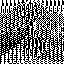

In [38]:
Image.fromarray(imgarr2bitarray(stego_array_grey,4).reshape(64,64)*255)

In [39]:
g2=imgarr2bitarray(stego_array_grey,2)
g3=imgarr2bitarray(stego_array_grey,3)
g4=imgarr2bitarray(stego_array_grey,4)

G8=[imgarr2bitarray(stego_array_grey,i+1) for i in range(8)]

In [41]:
def bitarray2imgarr(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr
 
def bitarray2imgarr_scale(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int_scale(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr

In [42]:
trans=bitarray2imgarr(g3,imgshape=(32,32),bit=3,color=1)
trans.shape

(32, 32, 1)

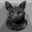

In [43]:
Image.fromarray(trans.reshape(32,32))

In [44]:
trans_scale=bitarray2imgarr(g4,imgshape=(32,32),bit=4,color=1)
trans_scale.shape

(32, 32, 1)

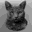

In [45]:
Image.fromarray(trans_scale.reshape(32,32))

In [ ]:
len(bit_array_2_byte_str(g4))

In [46]:
T8=[bitarray2imgarr(g,imgshape=(32,32),bit=i+1,color=1) for i,g in enumerate(G8)]

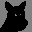

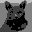

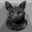

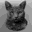

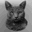

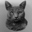

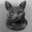

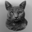

[None, None, None, None, None, None, None, None]

In [47]:
[display(Image.fromarray(t.reshape(32,32))) for t in T8]

In [52]:
640/72

8.88888888888889

To reconstitute the image from the bytestring we need to know...

- color (3 channels) or grey (1 channel)
- image height and width
- bits per pixel

In [53]:
#need is bitarray to bytestring function
cat_bytes5bit=bit_array_2_byte_str(G8[4])
len(cat_bytes5bit)

640

In [49]:
len(G8[4])

5120

In [ ]:
64*4*4/80

In [ ]:
#bytes
[ len(g)/8 for g in G8]

In [ ]:
#txn
[ len(g)/8/80 for g in G8]

In [ ]:
#doge
[ len(g)/8/80*2 for g in G8]